# KNN (K Nearest Neighbors) Classification
1. A supervised learning algorithm used for classification and regression
2. In classification, it predicts the class of a new point based on the majority class of its K nearest neighbors

3. ⚙️ How it works:
     1.  Choose K (number of neighbors)
     2. Measure distance (usually Euclidean) from the test point to all training points
     3. Pick the K nearest training points
     4. Assign the class that is most common among them

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# create a colums  in our dataFrame
df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [11]:
df[df.target== 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [12]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [21]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [23]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 
# This is a magic command used in Jupyter Notebook to display plots inline (inside the notebook).


## sepal length vs sepal width(Setosa vs Versicolor)

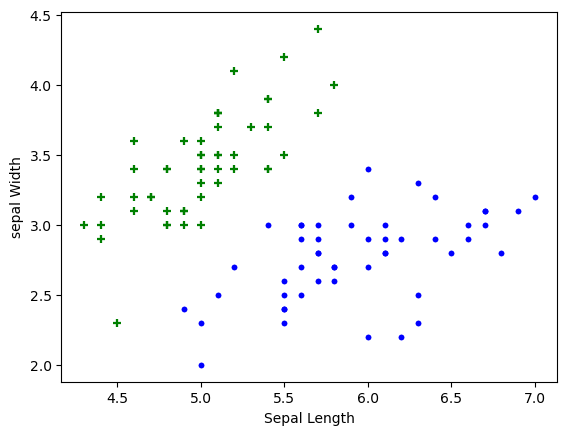

In [40]:
plt.xlabel('Sepal Length')
plt.ylabel('sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'g', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'b', marker = '.')
plt.show()

## petal length vs petal width(Setosa vs versicolor)

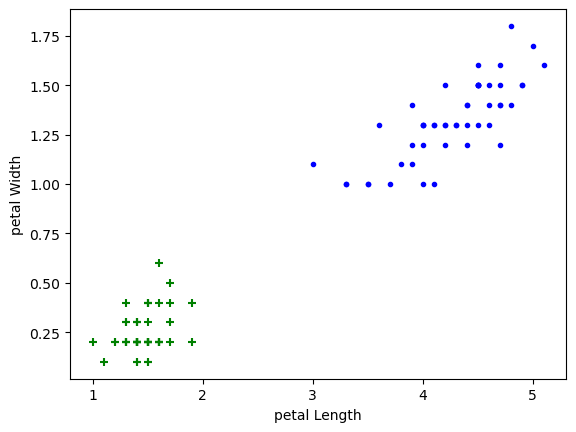

In [46]:
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'g', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'b', marker = '.')
plt.show()

In [56]:
# split data into Independent x and Dependent y
x = df.drop(['target','flower_name'], axis= 'columns')
y = df.target

In [48]:
# Now split the data for  train and test
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [62]:
len(x_train)

120

In [64]:
len(x_test)

30

## Create KNN(K Neighrest Neighbour ) classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10) ## find best k value to use GridCV 

In [71]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [75]:
knn.score(x_test,y_test)

0.9666666666666667

In [81]:
knn.predict([[4.8,3.0,1.5,0.3]])

C:\Users\VIKRAM\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

## plot Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

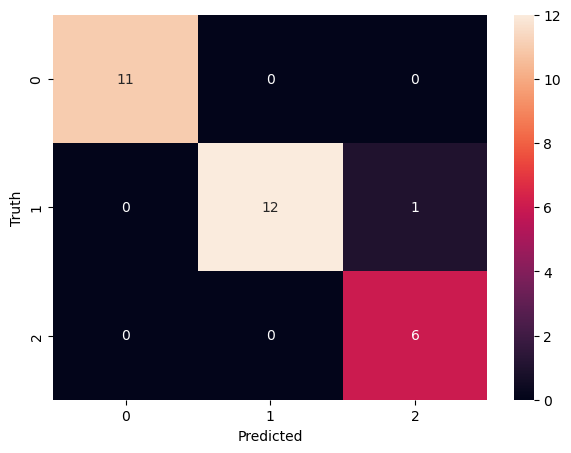

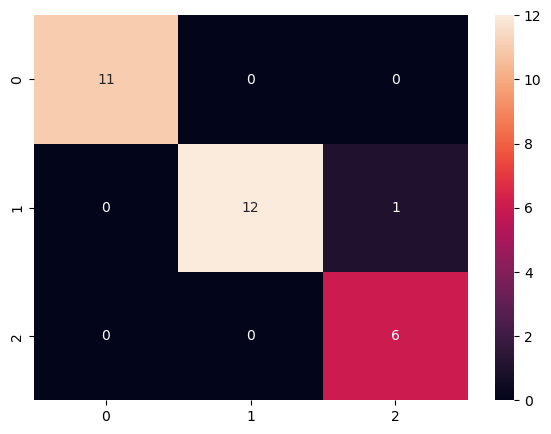

Text(0, 0.5, 'Truth')

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (7,5))
sns.heatmap(cm, annot = True)
plt.show()
plt.xlabel('Predicted')
plt.ylabel('Truth')



## print classification Report for Precession, recell and f1-score for each classes

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# In one Sort Impelentation for KNN Classification

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



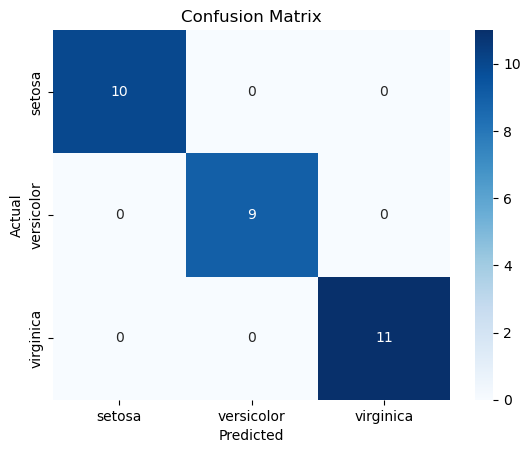

Predicted class: setosa


In [117]:
# Step 1: Import Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
iris = load_iris()
X = iris.data        # features
y = iris.target      # labels
#print(x)
# print(y)
# Step 3: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = knn.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 7: Predict New Sample
sample = [[4.8, 3.0, 1.5, 0.3]]         # your custom input
sample_scaled = scaler.transform(sample)
prediction = knn.predict(sample_scaled)
print("Predicted class:", iris.target_names[prediction[0]])
